<a href="https://colab.research.google.com/github/rsokur1515/Project-Analysis-of-the-reasons-for-Ireland-s-economic-growth/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Прыжок кельтского тигра: анализ факторов взрывного экономического роста Ирландии

## Часть 1: Сбор данных

Для анализа причин роста экономики Ирландии для начала необходимо определиться, динамику каких показателей необходимо отслеивать. Их бесчисленное множество, поэтому логически выделим основные группы факторов, чтобы в дальнейшем искать соотвественные источники данных. Ниже приведены основные такие группы:
<ol>
    <li><b>ВВП (валовый внутренний продукт)</b>: ВВП является одним из наиболее важных показателей экономической активности. Он отражает стоимость всех конечных товаров и услуг, произведенных в стране за определенный период времени. Изучение изменений ВВП со временем может помочь определить тенденции роста и спада экономики.</li>

<li><b>Инвестиции</b>: Данные об инвестициях, включая внутренние и внешние инвестиции, могут быть полезны для анализа экономической активности. Инвестиции способствуют росту производства и развитию новых предприятий, что в свою очередь может сказаться на росте экономики.</li>

<li><b>Рынок труда</b>: Данные о занятости, безработице и уровне заработной платы предоставляют информацию о состоянии рынка труда и его влиянии на экономический рост. Низкая безработица и растущие заработные платы могут способствовать увеличению потребительских расходов и инвестиций.</li>

<li><b>Индекс потребительских цен (ИПЦ)</b>: ИПЦ измеряет уровень инфляции в экономике. Рост потребительских цен может влиять на покупательскую способность населения и общий уровень экономической активности.</li>

<li><b>Внешнеторговый баланс</b>: Данные о внешнеторговом балансе, включая экспорт, импорт и торговый баланс, могут указывать на состояние международной торговли и конкурентоспособность экономики. Положительный внешнеторговый баланс может способствовать росту экономики.

<li><b>Финансовые показатели</b>: Информация о состоянии банковской системы, инвестиционных рынках, ставках процента и финансовой стабильности может быть полезной для понимания общей финансовой ситуации в стране.</li>

</ol>

Данные по многим из этих факторов можно найти на ресурсе www.theglobaleconomy.com, который позволяет выгрузить excel файл с необходимыми данными

In [806]:
# окно для импорта
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
import re
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [807]:
df = pd.read_csv('https://raw.githubusercontent.com/rsokur1515/Pr/main/30-04-23%2006_39_59_theglobaleconomy.csv')
df.head()

,Country,Code,ContinentCode,Year,Gross Domestic Product billions of U.S. dollars,Labor force million people,Unemployment rate,Exports of goods and services billion USD,Imports of goods and services billion USD,Foreign Direct Investment billion USD,...,Shadow economy percent of GDP,Bank credit to the private sector as percent of GDP,Liquid liabilities percent of GDP,Bank assets percent of GDP,Bank lending-deposit interest rate spread,Bank return on assets in percent,Population size in millions,Percent urban population,Economic globalization index (0-100),Cost of living index world average = 100
0,Ireland,IRL,EU,1960,1.94,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.68,32.83,NaN,NaN,2.83,45.18,NaN,NaN
1,Ireland,IRL,EU,1961,2.09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.74,32.45,NaN,NaN,2.82,45.39,NaN,NaN
2,Ireland,IRL,EU,1962,2.26,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.64,32.43,NaN,NaN,2.84,45.60,NaN,NaN
3,Ireland,IRL,EU,1963,2.43,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11.94,33.58,NaN,NaN,2.85,45.81,NaN,NaN
4,Ireland,IRL,EU,1964,2.77,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.60,34.30,NaN,NaN,2.87,46.02,NaN,NaN


В этой таблице уже достаточно много данных, тем не менее, нескольких важных фичей не достает, поэтому спарсим их с других источников данных:
<ul>
  <li>Данные об уровне инфляции - https://ru.wikipedia.org/wiki/Экономика_Ирландии </il>
  <li>Данные о  капитализации сельского хозяйства и промышленности- https://ru.wikipedia.org/wiki/Экономика_Ирландии </il>
</ul>

Спарсим данные с Википедии

In [808]:
source = requests.get("https://ru.wikipedia.org/wiki/Экономика_Ирландии").text
soup = bs4.BeautifulSoup(source, 'lxml')
table = soup.select_one('.wikitable');

In [809]:
df_1 = pd.read_html(str(table))
df_1 = df_1[0]
df_1.head()

,Год,ВВП (ППС) (в млрд долл. США),ВВП на душу населения (ППС) (в долл. США),Рост ВВП (реальный),Уровень инфляции (в процентах),Безработица (в процентах),Государственный долг (в процентах от ВВП)
0,1980,242,7074,"▲2,9 %","▲18,3 %",н/д,н/д
1,1981,"▲27,2","▲7,831","▲2,5 %","▲20,2 %",н/д,н/д
2,1982,"▲29,3","▲8,352","▲1,5 %","▲17,2 %",н/д,н/д
3,1983,"▲30,2","▲8,559","▼−0,7 %","▲10,4 %",н/д,н/д
4,1984,"▲32,3","▲9,082","▲3,2 %","▲8,6 %",н/д,н/д


Видно, что в таблице находятся нечисловые значения. Избавимся от них, а также от ненужных столбцов

In [810]:
def remove_extra_signs(s):
    s = str(s)
    s = re.sub(r'[^0-9.-]', '', s)
    if s == '':
        return np.nan
    return s
for column in df_1.columns:
    if column != 'Год':
        df_1[column] = pd.to_numeric(df_1[column].apply(remove_extra_signs), errors='coerce')
df_1['Уровень ифляции'] = df_1['Уровень инфляции (в процентах)'].div(10)
df_1 = df_1[["Год", "Уровень ифляции"]]
df_1.head()

,Год,Уровень ифляции
0,1980,18.3
1,1981,20.2
2,1982,17.2
3,1983,10.4
4,1984,8.6


Теперь наша таблица выглядит, как надо, осталось соединить ее с исходным столбцом

In [811]:
df_1.rename(columns={'Год': 'Year', 'Уровень ифляции':'Inflation rate'}, inplace=True)
merged_df = df.merge(df_1, how='left', on='Year')
merged_df.head()

,Country,Code,ContinentCode,Year,Gross Domestic Product billions of U.S. dollars,Labor force million people,Unemployment rate,Exports of goods and services billion USD,Imports of goods and services billion USD,Foreign Direct Investment billion USD,...,Bank credit to the private sector as percent of GDP,Liquid liabilities percent of GDP,Bank assets percent of GDP,Bank lending-deposit interest rate spread,Bank return on assets in percent,Population size in millions,Percent urban population,Economic globalization index (0-100),Cost of living index world average = 100,Inflation rate
0,Ireland,IRL,EU,1960,1.94,NaN,NaN,NaN,NaN,NaN,...,NaN,10.68,32.83,NaN,NaN,2.83,45.18,NaN,NaN,NaN
1,Ireland,IRL,EU,1961,2.09,NaN,NaN,NaN,NaN,NaN,...,NaN,10.74,32.45,NaN,NaN,2.82,45.39,NaN,NaN,NaN
2,Ireland,IRL,EU,1962,2.26,NaN,NaN,NaN,NaN,NaN,...,NaN,10.64,32.43,NaN,NaN,2.84,45.60,NaN,NaN,NaN
3,Ireland,IRL,EU,1963,2.43,NaN,NaN,NaN,NaN,NaN,...,NaN,11.94,33.58,NaN,NaN,2.85,45.81,NaN,NaN,NaN
4,Ireland,IRL,EU,1964,2.77,NaN,NaN,NaN,NaN,NaN,...,NaN,5.60,34.30,NaN,NaN,2.87,46.02,NaN,NaN,NaN


Сейчас необходимо добавить данные о том, как изменялась капитализация двух важнейших секторов экономики Ирландии. Сельского хозяйства и промышленности. Как известно, основным сектором Ирландии после отсоединения от Великобритании было сельское хозяйство. Изменилась ли данная ситуация с течением времени и как на это повлияло равитие промышленности?

In [812]:
source = requests.get("https://be5.biz/makroekonomika/agriculture/ie.html").text
soup = bs4.BeautifulSoup(source, 'lxml')
table = soup.select_one('.data')

In [813]:
df_2 = pd.read_html(str(table))
df_2 = df_2[0]
df_2.columns = df_2.columns.droplevel()
df_2 = df_2.iloc[:, :2]
df_2.columns = ['Year', 'Capitalization of agriculture']
df_2.head()

,Year,Capitalization of agriculture
0,1970,0.60
1,1971,0.67
2,1972,0.93
3,1973,1.10
4,1974,1.00


In [814]:
merged_df = merged_df.merge(df_2, how='left', on='Year')
merged_df = merged_df.drop(['Country', 'Code', 'ContinentCode'], axis = 1).set_index('Year')
merged_df.head()

,Gross Domestic Product billions of U.S. dollars,Labor force million people,Unemployment rate,Exports of goods and services billion USD,Imports of goods and services billion USD,Foreign Direct Investment billion USD,Net portfolio equity inflows,Trade balance billion USD,Government spending billion USD,Fiscal balance percent of GDP,...,Liquid liabilities percent of GDP,Bank assets percent of GDP,Bank lending-deposit interest rate spread,Bank return on assets in percent,Population size in millions,Percent urban population,Economic globalization index (0-100),Cost of living index world average = 100,Inflation rate,Capitalization of agriculture
Year,,,,,,,,,,,,,,,,,,,,,
1960,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.68,32.83,NaN,NaN,2.83,45.18,NaN,NaN,NaN,NaN
1961,2.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.74,32.45,NaN,NaN,2.82,45.39,NaN,NaN,NaN,NaN
1962,2.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.64,32.43,NaN,NaN,2.84,45.60,NaN,NaN,NaN,NaN
1963,2.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.94,33.58,NaN,NaN,2.85,45.81,NaN,NaN,NaN,NaN
1964,2.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.60,34.30,NaN,NaN,2.87,46.02,NaN,NaN,NaN,NaN


Добавили капитализацию сельского хозяйства Ирландии

In [815]:
source = requests.get("https://be5.biz/makroekonomika/industry/ie.html").text
soup = bs4.BeautifulSoup(source, 'lxml')
table = soup.select_one('.data')
df_3 = pd.read_html(str(table))
df_3 = df_3[0]
df_3.columns = df_3.columns.droplevel()
df_3 = df_3.iloc[:, :2]
df_3.columns = ['Year', 'Capitalization of industry']
df_3.head()

,Year,Capitalization of industry
0,1970,0.76
1,1971,0.87
2,1972,1.10
3,1973,1.30
4,1974,1.50


In [816]:
merged_df = merged_df.merge(df_3, how='left', on='Year')
merged_df.head()

,Year,Gross Domestic Product billions of U.S. dollars,Labor force million people,Unemployment rate,Exports of goods and services billion USD,Imports of goods and services billion USD,Foreign Direct Investment billion USD,Net portfolio equity inflows,Trade balance billion USD,Government spending billion USD,...,Bank assets percent of GDP,Bank lending-deposit interest rate spread,Bank return on assets in percent,Population size in millions,Percent urban population,Economic globalization index (0-100),Cost of living index world average = 100,Inflation rate,Capitalization of agriculture,Capitalization of industry
0,1960,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.83,NaN,NaN,2.83,45.18,NaN,NaN,NaN,NaN,NaN
1,1961,2.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.45,NaN,NaN,2.82,45.39,NaN,NaN,NaN,NaN,NaN
2,1962,2.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.43,NaN,NaN,2.84,45.60,NaN,NaN,NaN,NaN,NaN
3,1963,2.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.58,NaN,NaN,2.85,45.81,NaN,NaN,NaN,NaN,NaN
4,1964,2.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.30,NaN,NaN,2.87,46.02,NaN,NaN,NaN,NaN,NaN


Добавили капитализацию рыночного сектора

## Часть 2: Обработка данных

Опишем данные:

In [817]:
merged_df.columns

Index(['Year', 'Gross Domestic Product billions of U.S. dollars',
       'Labor force million people', 'Unemployment rate',
       'Exports of goods and services billion USD',
       'Imports of goods and services billion USD',
       'Foreign Direct Investment billion USD', 'Net portfolio equity inflows',
       'Trade balance billion USD', 'Government spending billion USD',
       'Fiscal balance percent of GDP', 'Shadow economy percent of GDP',
       'Bank credit to the private sector as percent of GDP',
       'Liquid liabilities percent of GDP', 'Bank assets percent of GDP',
       'Bank lending-deposit interest rate spread ',
       'Bank return on assets in percent', 'Population size in millions',
       'Percent urban population', 'Economic globalization index (0-100)',
       'Cost of living index world average = 100', 'Inflation rate',
       'Capitalization of agriculture', 'Capitalization of industry'],
      dtype='object')

<ol>
<li><b>Labor force million people</b>: Рабочая сила в миллионах человек. Позволяет оценить размер и потенциал рабочей силы в стране, что влияет на производственные возможности и рост ВВП. Чем больше рабочая сила, тем больше ресурсов доступно для экономической деятельности и производства товаров и услуг.

<li><b>Unemployment rate</b>: Уровень безработицы. Дает представление о состоянии рынка труда в стране и может свидетельствовать о возможных проблемах или неэффективности в экономике. Высокий уровень безработицы может указывать на низкую экономическую активность и ограниченные возможности роста ВВП.

<li><b>Exports of goods and services billion USD</b>: Экспорт товаров и услуг в миллиардах долларов США. Показывает объем экспорта, который является важным фактором для роста ВВП и внешнеторгового баланса. Большие объемы экспорта могут способствовать увеличению ВВП, привлечению иностранных валют и созданию рабочих мест.

<li><b>Imports of goods and services billion USD</b>: Импорт товаров и услуг в миллиардах долларов США. Позволяет оценить объем импорта, который может влиять на экономическую активность и торговый баланс страны. Импорт может указывать на потребности и потенциальные недостатки внутреннего производства, а также влиять на ВВП через связанные с ними отрасли.

<li><b>Foreign Direct Investment billion USD</b>: Прямые иностранные инвестиции в миллиардах долларов США. Показывает объем инвестиций из-за рубежа, которые могут оказывать положительное влияние на экономический рост и развитие страны. Прямые иностранные инвестиции могут способствовать созданию новых предприятий, технологическому развитию, повышению производительности и росту ВВП.

<li><b>Net portfolio equity inflows</b>: Чистый приток портфельных инвестиций в акции. Эта характеристика показывает объем вложений в акции со стороны иностранных инвесторов и может свидетельствовать о притоке капитала в страну. Большой объем чистых притоков портфельных инвестиций может способствовать развитию финансового сектора и созданию новых рабочих мест, что в конечном счете может способствовать росту ВВП.

<li><b>Trade balance billion USD</b>: Торговый баланс в миллиардах долларов США. Это разница между экспортом и импортом товаров и услуг страны. Положительный торговый баланс (экспорт превышает импорт) может способствовать росту ВВП, поскольку это означает, что страна получает больше дохода от экспорта, чем тратит на импорт.

<li><b>Government spending billion USD</b>: Расходы правительства в миллиардах долларов США. Эта характеристика отражает объем государственных расходов на различные секторы экономики, такие как здравоохранение, образование, инфраструктура и оборона. Высокие государственные расходы могут стимулировать экономическую активность и способствовать росту ВВП.

<li><b>Fiscal balance percent of GDP</b>: Фискальный баланс в процентах от ВВП. Эта характеристика показывает соотношение между государственными доходами и расходами. Положительный фискальный баланс (государственные доходы превышают расходы) может указывать на финансовую устойчивость страны и может иметь положительное влияние на рост ВВП.

<li><b>Shadow economy percent of GDP</b>: Доля теневой экономики в процентах от ВВП. Эта характеристика показывает объем неофициальной экономической деятельности, которая не учитывается в официальной статистике. Высокая доля теневой экономики может указывать на проблемы с налогообложением, низкую эффективность государственных институтов и недостаточную регулировку экономики. Она может быть полезна для понимания скрытых факторов, влияющих на размер и рост ВВП.

<li><b>Bank credit to the private sector as percent of GDP</b>: Доля банковского кредита частному сектору в процентах от ВВП. Эта характеристика показывает объем кредитования, предоставляемого банками частному сектору в стране. Большой объем банковского кредита может способствовать развитию предпринимательства, инвестициям и экономическому росту, так как предоставление кредита помогает компаниям расширять свою деятельность и реализовывать новые проекты.

<li><b>Liquid liabilities percent of GDP</b>: Доля ликвидных обязательств в процентах от ВВП. Эта характеристика отражает долю долговых обязательств, которые могут быть легко преобразованы в наличные средства, в общей экономике. Высокая доля ликвидных обязательств может свидетельствовать о финансовой стабильности и доступности средств для инвестиций и расходов, что может способствовать росту ВВП.

<li><b>Bank assets percent of GDP</b>: Доля активов банков в процентах от ВВП. Эта характеристика показывает размер банковской системы в стране. Большой размер банковских активов может указывать на развитие финансового сектора, доступность кредитования и инвестиций, а также на общую финансовую стабильность. Это может оказывать влияние на рост ВВП через финансовые механизмы и финансирование экономической деятельности.

<li><b>Bank lending-deposit interest rate spread</b>: Разница между процентной ставкой по кредитам и процентной ставкой по депозитам в банках. Эта характеристика отражает разницу между доходностью, которую банки получают от предоставления кредитов, и доходностью, которую они платят вкладчикам на депозиты. Большая разница может указывать на присутствие высоких процентных марж для банков и может свидетельствовать о финансовой эффективности банковской системы. Это может быть полезно в анализе ВВП, так как доступность и стоимость кредитования влияют на инвестиции, расходы и экономическую активность.

<li><b>Bank return on assets in percent</b>: Доходность активов банка в процентах. Эта характеристика показывает эффективность использования активов банка для генерации прибыли. Большая доходность активов может свидетельствовать о финансовой стабильности и эффективном управлении банком. Она может быть полезна в анализе ВВП, так как эффективная и стабильная банковская система способствует предоставлению финансирования для инвестиций и экономического роста.

<li><b>Population size in millions</b>: Размер населения в миллионах. Эта характеристика указывает на общее количество людей в стране. Большое население может означать наличие большого внутреннего рынка, что способствует росту потребления и производства товаров и услуг. Она может быть полезна в анализе ВВП, так как потенциальный рынок и покупательная способность населения являются важными факторами для развития экономики.

<li><b>Percent urban population</b>: процент городского населения в стране может быть полезен в анализе ВВП, поскольку города часто являются центрами экономической активности, таких как бизнес, транспорт, торговля и производство. Поэтому страны с более высоким процентом городского населения, как правило, имеют более высокий ВВП, чем те, у которых процент городского населения ниже.

<li><b>Economic globalization index (0-100)</b>: индекс экономической глобализации может помочь в определении уровня интеграции экономики страны с мировой экономикой. Страны с более высоким индексом могут иметь более высокий ВВП за счет более открытой экономики, более эффективного использования ресурсов и доступа к более широким рынкам.

<li><b>Cost of living index world average = 100</b>: индекс стоимости жизни может помочь в оценке уровня жизни населения и соответственно его покупательной способности. Более высокие уровни покупательной способности могут привести к большей экономической активности, что может повысить ВВП.

<li><b>Inflation rate</b>: уровень инфляции может оказать значительное влияние на экономику страны, поскольку он может повлиять на спрос и предложение товаров и услуг, а также на уровень инвестиций. Более высокая инфляция может снизить покупательную способность населения и уменьшить объем потребления, что может снизить ВВП.

<li><b>Capitalization of agriculture</b>: капитализация сельского хозяйства может помочь определить вклад сельского хозяйства в ВВП страны. Это может быть важным фактором в странах, где сельское хозяйство является одной из главных отраслей экономики.

<li><b>Capitalization of industry</b>: капитализация промышленности может помочь определить вклад промышленности в ВВП страны. Это может быть важным фактором в странах, где промышленность является одной из главных отраслей экономики.

В данном случае признаки можно разделить на две группы:

<ol>
  <li>Признаки, которые, предположительно, оказывают большее влияние на ВВП, чем ВВП оказывает на них
  <ol>
    <li>Labor force million people
    <li>Foreign Direct Investment billion USD
    <li>Net portfolio equity inflows
    <li>Trade balance billion USD
    <li>Government spending billion USD
    <li>Fiscal balance percent of GDP
    <li>Shadow economy percent of GDP
    <li>Population size in millions
    <li>Percent urban population
    <li>Inflation rate
    <li>Bank credit to the private sector as percent of GDP
  </ol>
  <li>Признаки, степень влияния которых на ВВП трудно определить
    <ol>
    <li>Unemployment rate
    <li>Exports of goods and services billion USD
    <li>Imports of goods and services billion USD
    <li>Bank lending-deposit interest rate spread
    <li>Bank return on assets in percent
    <li>Cost of living index world average = 100
    <li>Capitalization of agriculture
    <li>Capitalization of industry
    <li>Liquid liabilities percent of GDP
    <li>Bank assets percent of GDP
    <li>Economic globalization index (0-100)
  </ol>
</ol>

В дальнейшем при визуализации данных и нахождении причнно-следственных связей большее внимания мы будем уделать именно первой группе факторов




In [818]:
features_1 = [
    "Labor force million people",
    "Foreign Direct Investment billion USD",
    "Net portfolio equity inflows",
    "Trade balance billion USD",
    "Government spending billion USD",
    "Fiscal balance percent of GDP",
    "Shadow economy percent of GDP",
    "Population size in millions",
    "Percent urban population",
    "Inflation rate",
    "Bank credit to the private sector as percent of GDP"
]
features_2 = [
    "Unemployment rate",
    "Exports of goods and services billion USD",
    "Imports of goods and services billion USD",
    "Bank lending-deposit interest rate spread",
    "Bank return on assets in percent",
    "Cost of living index world average = 100",
    "Capitalization of agriculture",
    "Capitalization of industry",
    "Liquid liabilities percent of GDP",
    "Bank assets percent of GDP",
    "Economic globalization index (0-100)"
]


В данной таблице также остались относительные характеристики, преобразование которых в абсолютные будет давать более хорошее понимание их влияния на ВВП и большую наглядность. Превратим их в абсолютные

In [819]:
for k in ['Foreign Direct Investment billion USD', 'Net portfolio equity inflows', 'Trade balance billion USD']:
  merged_df[k] = merged_df[k].cumsum()
merged_df.tail()

,Year,Gross Domestic Product billions of U.S. dollars,Labor force million people,Unemployment rate,Exports of goods and services billion USD,Imports of goods and services billion USD,Foreign Direct Investment billion USD,Net portfolio equity inflows,Trade balance billion USD,Government spending billion USD,...,Bank assets percent of GDP,Bank lending-deposit interest rate spread,Bank return on assets in percent,Population size in millions,Percent urban population,Economic globalization index (0-100),Cost of living index world average = 100,Inflation rate,Capitalization of agriculture,Capitalization of industry
57,2017,336.38,2.35,6.71,407.07,332.97,1011.31,2278493.88,556.31,41.45,...,49.95,NaN,0.62,4.81,62.95,87.97,157.19,0.3,4.0,112.4
58,2018,385.74,2.40,5.74,473.63,363.72,1078.67,2384105.76,666.79,46.34,...,46.12,NaN,1.06,4.87,63.17,87.81,NaN,NaN,3.4,132.2
59,2019,399.32,2.45,4.95,510.65,496.64,1032.04,2629892.76,716.12,47.98,...,40.36,NaN,1.24,4.93,63.40,88.14,NaN,NaN,3.6,131.7
60,2020,425.85,2.43,5.62,567.82,487.30,1066.82,2840388.89,798.24,54.92,...,37.66,NaN,0.14,4.99,63.65,88.00,NaN,NaN,4.0,150.4
61,2021,504.18,2.55,6.63,677.70,479.13,1147.84,3172643.47,997.72,61.79,...,31.99,NaN,1.00,5.03,63.91,NaN,NaN,NaN,5.1,180.2


In [820]:
merged_df[merged_df['Labor force million people'].isnull()].head()

,Year,Gross Domestic Product billions of U.S. dollars,Labor force million people,Unemployment rate,Exports of goods and services billion USD,Imports of goods and services billion USD,Foreign Direct Investment billion USD,Net portfolio equity inflows,Trade balance billion USD,Government spending billion USD,...,Bank assets percent of GDP,Bank lending-deposit interest rate spread,Bank return on assets in percent,Population size in millions,Percent urban population,Economic globalization index (0-100),Cost of living index world average = 100,Inflation rate,Capitalization of agriculture,Capitalization of industry
0,1960,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.83,NaN,NaN,2.83,45.18,NaN,NaN,NaN,NaN,NaN
1,1961,2.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.45,NaN,NaN,2.82,45.39,NaN,NaN,NaN,NaN,NaN
2,1962,2.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.43,NaN,NaN,2.84,45.60,NaN,NaN,NaN,NaN,NaN
3,1963,2.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.58,NaN,NaN,2.85,45.81,NaN,NaN,NaN,NaN,NaN
4,1964,2.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.30,NaN,NaN,2.87,46.02,NaN,NaN,NaN,NaN,NaN


Прверим, сколько пропусков у нас в данных

In [821]:
merged_df.isnull().sum()

Year                                                    0
Gross Domestic Product billions of U.S. dollars         0
Labor force million people                             30
Unemployment rate                                      31
Exports of goods and services billion USD              10
Imports of goods and services billion USD              10
Foreign Direct Investment billion USD                  10
Net portfolio equity inflows                           22
Trade balance billion USD                              45
Government spending billion USD                        10
Fiscal balance percent of GDP                          35
Shadow economy percent of GDP                          37
Bank credit to the private sector as percent of GDP    42
Liquid liabilities percent of GDP                       2
Bank assets percent of GDP                              2
Bank lending-deposit interest rate spread              62
Bank return on assets in percent                       42
Population siz

In [822]:
len(merged_df['Year'])

62

Для наших данных в 62 года пропуски более чем 30-и лет - это достаточно критично, поэтому можно избавиться от этих переменных (создать новую переменную без этих признаков, чтобы потом при необходимости вернуться к удаленным характеристикам). Остальные же пропуски есть смысл заменить на нули, потому что остуствие данных означает, что эти характеристики были не настолько развиты, чтобы вести учет, или страна была не настолько развита, чтобы вести по ним учет, в связи с чем эти характеристики должны быть околонулевыми

In [823]:
final_df = merged_df.drop(columns=merged_df.isnull().sum()[merged_df.isnull().sum() > 30].index)
final_df = final_df.fillna(0)
final_df.isnull().sum()

Year                                               0
Gross Domestic Product billions of U.S. dollars    0
Labor force million people                         0
Exports of goods and services billion USD          0
Imports of goods and services billion USD          0
Foreign Direct Investment billion USD              0
Net portfolio equity inflows                       0
Government spending billion USD                    0
Liquid liabilities percent of GDP                  0
Bank assets percent of GDP                         0
Population size in millions                        0
Percent urban population                           0
Economic globalization index (0-100)               0
Inflation rate                                     0
Capitalization of agriculture                      0
Capitalization of industry                         0
dtype: int64

In [824]:
len(final_df.columns)

16

## Часть 3: Визуализация

Чтобы строить визуализацию не для всех пятнадцати признаков, найдем наиболее коррелирующие с ВВП

### Категория 1

In [825]:
features_1 = [value for value in features_1 if value in final_df.columns]
features_2 = [value for value in features_2 if value in final_df.columns]
features_2

['Exports of goods and services billion USD',
 'Imports of goods and services billion USD',
 'Capitalization of agriculture',
 'Capitalization of industry',
 'Liquid liabilities percent of GDP',
 'Bank assets percent of GDP',
 'Economic globalization index (0-100)']

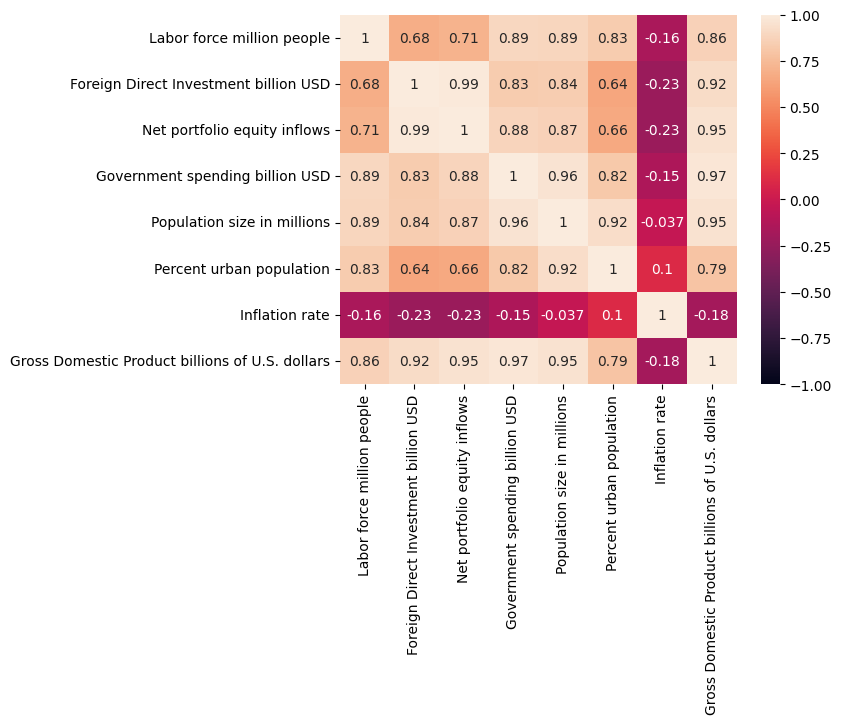

In [826]:
matrix_features = features_1 + ['Gross Domestic Product billions of U.S. dollars']
correlation_matrix_features_1 = final_df[matrix_features].corr()
sns.heatmap(correlation_matrix_features_1, annot=True, vmax=1, vmin=-1);

In [827]:
correlation_matrix_features_1['Gross Domestic Product billions of U.S. dollars'][correlation_matrix_features_1['Gross Domestic Product billions of U.S. dollars'].abs() > 0.9]

Foreign Direct Investment billion USD              0.921260
Net portfolio equity inflows                       0.951586
Government spending billion USD                    0.971826
Population size in millions                        0.947424
Gross Domestic Product billions of U.S. dollars    1.000000
Name: Gross Domestic Product billions of U.S. dollars, dtype: float64

Видим, что наибольшее влияние на ВВП оказывают такие признаки, как прямые иностранные инвестиции, приток портфельных инвестиций, государственные расходы и количество населения в стране. Проанализируем их диаграммы и облака рассеивания для нахождения наиболее весомых закономерностей

In [828]:
features_1 = ['Foreign Direct Investment billion USD', 'Net portfolio equity inflows', 'Government spending billion USD', 'Population size in millions'] # Оставляем только те фичи, которые оказывают наиб. влияние

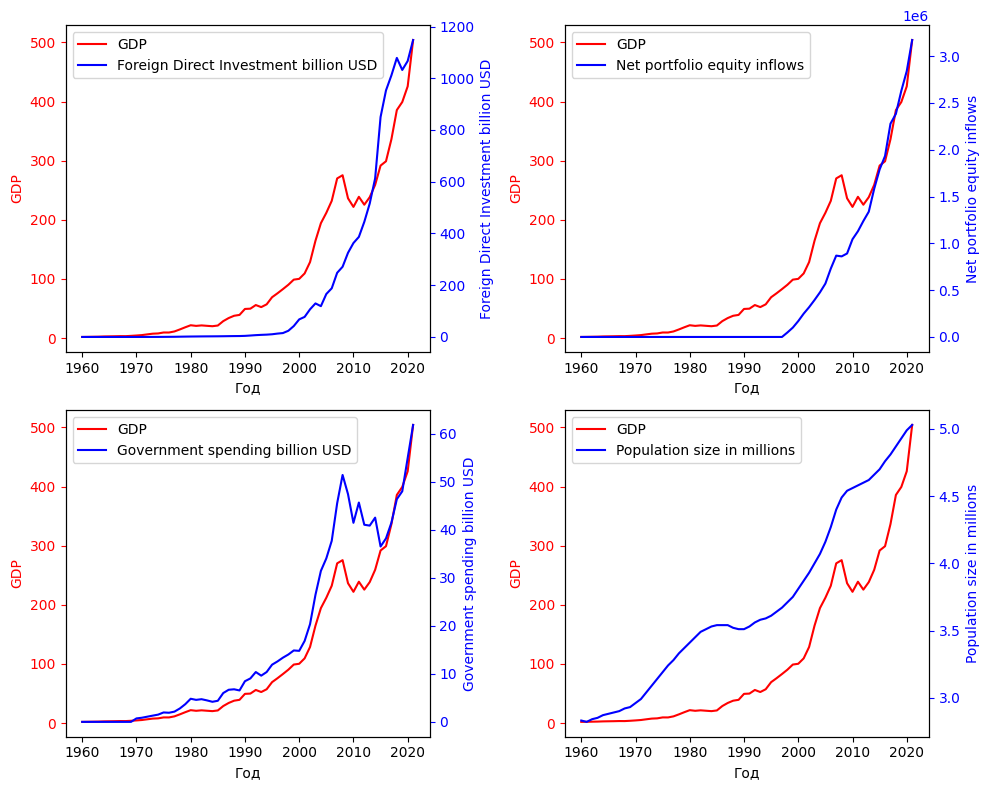

In [829]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, k in enumerate(features_1):
    # Вычисление координат текущего графика
    row = i // 2
    col = i % 2

    # Создание основного графика
    ax1 = axs[row][col]

    # Построение первой диаграммы на основной оси ax1
    ax1.plot(final_df['Year'], final_df['Gross Domestic Product billions of U.S. dollars'], 'r-', label='GDP')
    ax1.set_xlabel('Год')
    ax1.set_ylabel('GDP', color='r')
    ax1.tick_params('y', colors='r')

    # Создание вспомогательной оси
    ax2 = ax1.twinx()

    # Построение второй диаграммы на вспомогательной оси ax2
    ax2.plot(final_df['Year'], final_df[k], 'b-', label=k)
    ax2.set_ylabel(k, color='b')
    ax2.tick_params('y', colors='b')

    # Добавление легенды к диаграммам
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.tight_layout()
plt.show()


Промежуточные замечания по графику:


*   Графики ПИИ и портфельных инвестиций крайне схожи между собой, можно предположить, что в целом, портфельные инвестиции осуществляются тогда же, когда и ПИИ
*   Обратив внимание на графики государственных расходов и ВВП, можно заметить, что график гос. расходов уж слишком сильно повторяет динамику ВВП. Тут надо вспомнить, что государственные расходы, конечно же, очень зависят от размера экономики, поэтому могут динамику, схожую с динамикой ВВП. В данном случае, чтобы понять, дейтсвительно ли увеличение акцента государства на государственные расходы смогло повлиять на ВВП, необходимо провести дополнительное исследование и сравнить именно относительное изменение гос. расходов (в % от ВВП) с ВВП

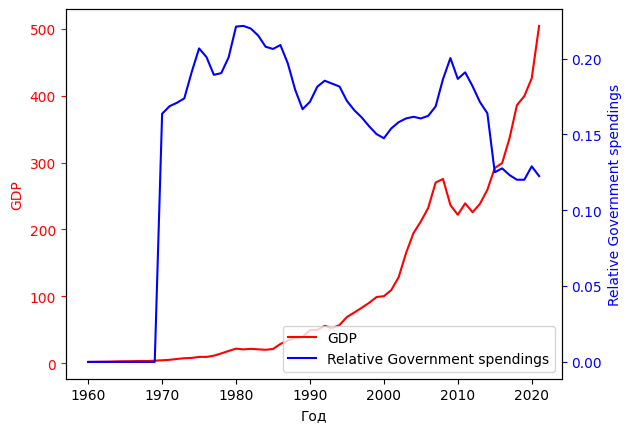

In [830]:
relative_spendings = final_df['Government spending billion USD']/final_df['Gross Domestic Product billions of U.S. dollars']
fig, ax1 = plt.subplots()

# Построение первой диаграммы на основной оси ax1
ax1.plot(final_df['Year'], final_df['Gross Domestic Product billions of U.S. dollars'], 'r-', label='GDP')
ax1.set_xlabel('Год')
ax1.set_ylabel('GDP', color='r')
ax1.tick_params('y', colors='r')

    # Создание вспомогательной оси
ax2 = ax1.twinx()

    # Построение второй диаграммы на вспомогательной оси ax2
ax2.plot(final_df['Year'], relative_spendings, 'b-', label="Relative Government spendings")
ax2.set_ylabel("Relative Government spendings", color='b')
ax2.tick_params('y', colors='b')

    # Добавление легенды к диаграммам
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

    # Отображение графика
plt.show()

Смотря на относительные государственные траты, можно утверждать, что уровень государственных затрат, а следовательно и активная фискальная политика, влияют на ВВП отрицательно. Чтобы в этом окончательно удостовериться, посчитаем корреляцию между ними

In [831]:
correlation = np.corrcoef(relative_spendings[20:], final_df['Gross Domestic Product billions of U.S. dollars'][20:])[0, 1]
# данные за 1960-1970-ый год по государственным расходам отсутсвуют, поэтому рост с нуля до какого-либо положительного значения может
# вызвать присрост корреляции. Чтобы этого не допустить, посчитаем корреляцию за период, когда инофрмация есть - с 1980-ого года
correlation

-0.7164414273046118

Корреляция получилась не просто маленькой, но и сильно отрицательной, говорящей о ярко-выраженной отрицательной линейной взаимосвязи между ВВП и государственными расходами.

Отсюда получаем первый полноценный вывод: <b> уменьшение государственных расходов положительно повлияло на развитие экономики Ирландии </b>

Из признаков первой группы же можно оставить для дальнейшего рассмотрения только прямые иностранные инвестиции и численность населения. Портфельные инвестиции можно откинуть, во-первых, потому что, как мы выяснили ранее, динамика ПИИ очень схожа с динамикой портфельных инвестиций, а во-вторых, потому что объем ПИИ значительно существенннее, чем объем портфельных инвестиций

In [832]:
final_df['Government spending billion USD'] = relative_spendings
final_df = final_df.rename(columns={'Government spending billion USD': 'Government spending'})


Для более корректного определения взаимосвязи ПИИ и ВВП, построим облако рассеивания

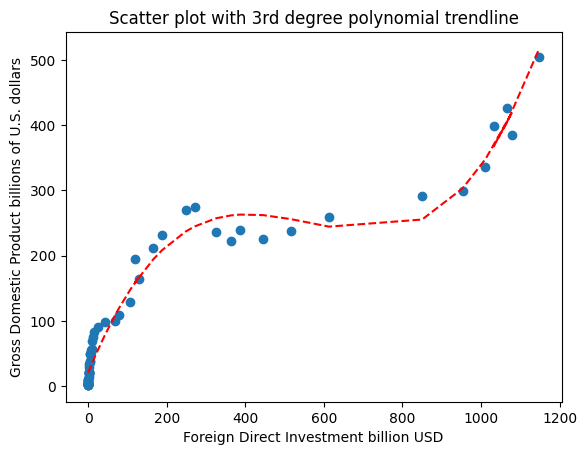

In [833]:
import matplotlib.pyplot as plt
import numpy as np

# Выбираем данные для осей x и y
y = final_df['Gross Domestic Product billions of U.S. dollars']
x = final_df['Foreign Direct Investment billion USD']

# Строим облако рассеивания
plt.scatter(x, y)

# Добавляем полиномиальную линию тренда
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

# Добавляем подписи к осям и заголовок
plt.xlabel('Foreign Direct Investment billion USD')
plt.ylabel('Gross Domestic Product billions of U.S. dollars')
plt.title('Scatter plot with 3rd degree polynomial trendline')

# Отображаем график
plt.show()


Согласно неоклассической макроэкономической теории, производственная функция в зависимости от ВВП должна иметь положительную первую производную и отрицательную вторую производную (как на иллюстрации ниже). Однако, как видно из облака рассеивания, производственная функция Ирландии подобным предпосылкам не подчиняется: например, его первая производная на первом участке постепенно уменьшалась, на втором участке стала отрицательной, а на третьем участке снова начала увеличиваться. Соответсвенно, скорее всего, на взаимосвязь ПИИ и ВВП что-то влияло. Чтобы понять, что это могло быть, сравним получившуюся функцию с аналогичными функциями для других экономик, также известных своим активным ростом ПИИ. Возьмём для сравнения Сингапур и Китай

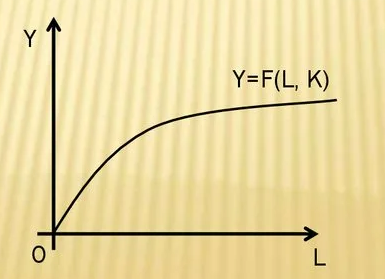

Спарсим необходимые данные для Сингапура и Китая

In [834]:
def parsing_data(url):

    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    table_new = soup.find_all('table')[1]

    headers = []
    for i in table_new.find_all('th'):
        title = i.text
        headers.append(title)

    headers = headers[1::]

    data = pd.DataFrame(columns = headers)

    for j in table_new.find_all('tr')[2:]:
        row_data = j.find_all('td')
        length = len(data)
        data.loc[length] = [i.text for i in row_data]

    data = data.iloc[:, :2].sort_values('Year')
    data.columns = ['Year', '-']

    return data

# Источник: https://idatica.com/blog/parsing-tablitsy-s-sayta-na-python-poshagovoye-rukovodstvo/

In [835]:
ch_gdp = parsing_data('https://www.macrotrends.net/countries/CHN/china/gdp-gross-domestic-product')
sin_gdp = parsing_data('https://www.macrotrends.net/countries/SGP/singapore/foreign-direct-investment')
ind_gdp = parsing_data('https://www.macrotrends.net/countries/IND/india/foreign-direct-investment')

gdp_table = ch_gdp.merge((sin_gdp.merge(ind_gdp, on = 'Year')), on = 'Year').set_index('Year')
gdp_table.columns = ['China', 'Singapore', 'India']
gdp_table.head()

,China,Singapore,India
Year,,,
1970,$92.60B,$0.09B,$0.05B
1971,$99.80B,$0.12B,$0.05B
1972,$113.69B,$0.16B,$0.02B
1973,$138.54B,$0.35B,$0.04B
1974,$144.18B,$0.34B,$0.06B


In [836]:
gdp_table['China'] = gdp_table['China'].str.replace('$', '').str.replace('B', '').str.replace(',', '').astype(float)
gdp_table['Singapore'] = gdp_table['Singapore'].str.replace('$', '').str.replace('B', '').str.replace(',', '').astype(float)
gdp_table['India'] = gdp_table['India'].str.replace('$', '').str.replace('B', '').str.replace(',', '').astype(float)
gdp_table.head()

,China,Singapore,India
Year,,,
1970,92.60,0.09,0.05
1971,99.80,0.12,0.05
1972,113.69,0.16,0.02
1973,138.54,0.35,0.04
1974,144.18,0.34,0.06


In [837]:
ch_dfi = parsing_data('https://www.macrotrends.net/countries/CHN/china/foreign-direct-investment')
sin_dfi = parsing_data('https://www.macrotrends.net/countries/SGP/singapore/foreign-direct-investment')
ind_dfi = parsing_data('https://www.macrotrends.net/countries/IND/india/foreign-direct-investment')

dfi_table = ch_dfi.merge((sin_dfi.merge(ind_dfi, on = 'Year')), on = 'Year').set_index('Year')
dfi_table.columns = ['China', 'Singapore', 'India']
dfi_table.head()

,China,Singapore,India
Year,,,
1979,$0.00B,$0.84B,$0.05B
1980,$0.06B,$1.24B,$0.08B
1981,$0.27B,$1.66B,$0.09B
1982,$0.43B,$1.60B,$0.07B
1983,$0.64B,$1.13B,$0.01B


In [838]:
dfi_table['China'] = dfi_table['China'].str.replace('$', '').str.replace('B', '').str.replace(',', '').astype(float)
dfi_table['Singapore'] = dfi_table['Singapore'].str.replace('$', '').str.replace('B', '').str.replace(',', '').astype(float)
dfi_table['India'] = dfi_table['India'].str.replace('$', '').str.replace('B', '').str.replace(',', '').astype(float)
dfi_table['China'] = dfi_table['China'].cumsum()
dfi_table['Singapore'] = dfi_table['China'].cumsum()
dfi_table['India'] = dfi_table['China'].cumsum()
dfi_table.head()

,China,Singapore,India
Year,,,
1979,0.00,0.00,0.00
1980,0.06,0.06,0.06
1981,0.33,0.39,0.39
1982,0.76,1.15,1.15
1983,1.40,2.55,2.55


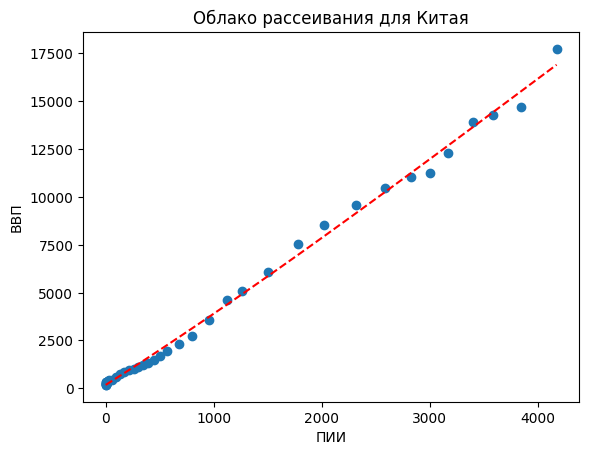

In [839]:
# Выбираем данные для осей x и y
y = gdp_table['China'][9:]
x = dfi_table['China']

# Строим облако рассеивания
plt.scatter(x, y)

# Добавляем полиномиальную линию тренда
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

# Добавляем подписи к осям и заголовок
plt.xlabel('ПИИ')
plt.ylabel('ВВП')
plt.title('Облако рассеивания для Китая')

# Отображаем график
plt.show()

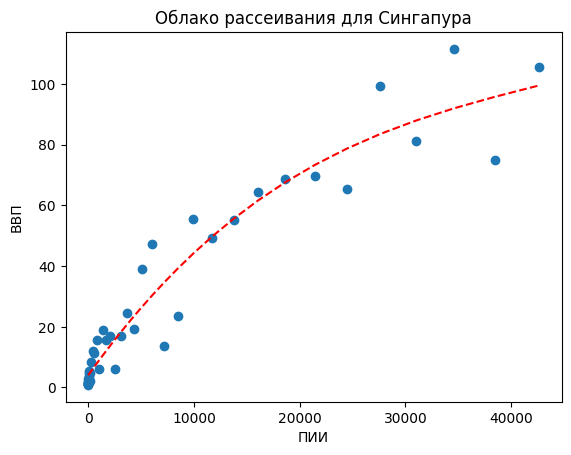

In [840]:
# Выбираем данные для осей x и y
y = gdp_table['Singapore'][9:]
x = dfi_table['Singapore']

# Строим облако рассеивания
plt.scatter(x, y)

# Добавляем полиномиальную линию тренда
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

# Добавляем подписи к осям и заголовок
plt.xlabel('ПИИ')
plt.ylabel('ВВП')
plt.title('Облако рассеивания для Сингапура')

# Отображаем график
plt.show()

Построив облако рассеивания для выбранных стран, можно заметить, что функция производства
по капиталу в Сингапуре как раз соответствует неоклассическим предпосылкам: в какой-то
момент дополнительное привлечение прямых иностранных инвестиций в Сингапур
оказывает не такое сильное воздействие на ВВП, как раньше, угол наклона касательной к
функции производства уменьшается. С Китаем же совершенно иная ситуация: в Китае ПИИ
всегда оказывали одинаковые влияние на ВВП, функция выглядит как прямая, имеющая
угол 45 градусов, что может говорить о существовании единичного мультипликатора
увеличения ПИИ в Китае. Какое глобальное различие между Китаем и Сингапуром могло
бы вызывать подобные явления? Иными словами, что бы могло тормозить влияние ПИИ в
Сингапуре, при этом не ухудшая эффект ПИИ на ВВП Китая? Вероятно, это количество
труда. Чтобы проверить это предположение, рассмотрим еще одну страну, которая
характеризуется большим количеством рабочей силы, а именно Индию

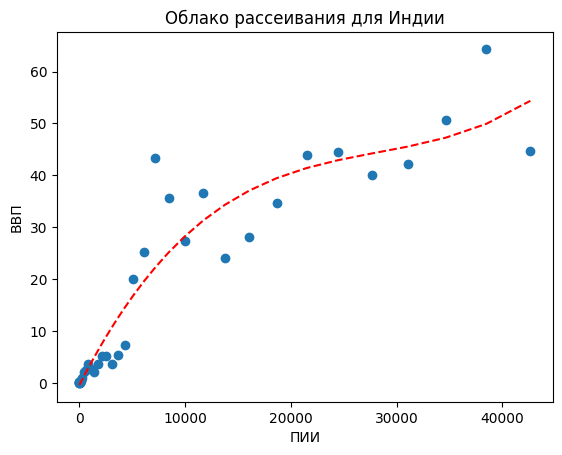

In [841]:
# Выбираем данные для осей x и y
y = gdp_table['India'][9:]
x = dfi_table['India']

# Строим облако рассеивания
plt.scatter(x, y)

# Добавляем полиномиальную линию тренда
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

# Добавляем подписи к осям и заголовок
plt.xlabel('ПИИ')
plt.ylabel('ВВП')
plt.title('Облако рассеивания для Индии')

# Отображаем график
plt.show()

Для Индии взаимосвязь между ПИИ и ВВП, как и в Китае, имеет вид практически прямой.
Особенно в сравнении с Сингапуром заметно, что предельная отдача от иностранного
капитала
не
падает
с
увеличением
его количества.
Отсюда
можно
сделать предварительный вывод о том, что предложение рабочей силы может иметь существенное
влияние на предельную отдачу иностранного капитала. Вернемся к Ирландии, чтобы это
проверить. Посмотрим, как менялось предложение труда в Ирландии в те годы, когда были
замечены аномалии в поведении производственной функции. В качестве меры предложения
труда возьмем количество населения, так как по нему имеются данные за интересующие
нас года.

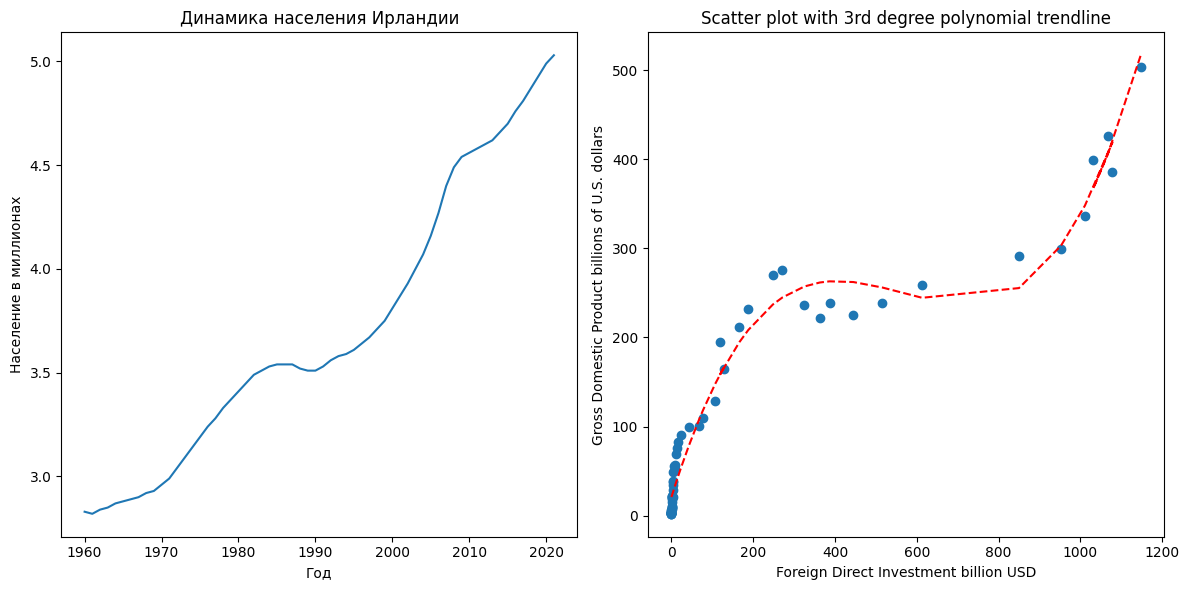

In [842]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# График 1 - Динамика населения Ирландии
axs[0].plot(final_df['Year'], final_df['Population size in millions'])
axs[0].set_xlabel('Год')
axs[0].set_ylabel('Население в миллионах')
axs[0].set_title('Динамика населения Ирландии')

# График 2 - Облако рассеивания с полиномиальной линией тренда
y = final_df['Gross Domestic Product billions of U.S. dollars']
x = final_df['Foreign Direct Investment billion USD']

axs[1].scatter(x, y)
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
axs[1].plot(x, p(x), "r--")
axs[1].set_xlabel('Foreign Direct Investment billion USD')
axs[1].set_ylabel('Gross Domestic Product billions of U.S. dollars')
axs[1].set_title('Scatter plot with 3rd degree polynomial trendline')

# Расположение графиков в сетке
plt.tight_layout()

# Отображение графиков
plt.show()

На двух представленных графиках можно заметить следующую закономерность:
действительно, когда население в Ирландии падало, например, в период с 1980-ого по 1990-
ый год, рост ПИИ не оказывал значительного влияние на ВВП и не приводил к увеличению
темпов экономического роста в Ирландии, кроме того, когда количество населения
достигало своего локального минимума, при росте ПИИ могло наблюдаться даже падение
объемов производства. Через некоторое время после восстановления роста населения мог
наблюдаться и рост ВВП.
Подытоживая все написанное выше, можно сказать, что увеличение прямых иностранных
инвестиций сопоставимо с увеличением ВВП только тогда, когда в стране достаточно
человеческого труда, который мог бы использовать приходящий в страну иностранный
капитал. Именно поэтому отдача от иностранного капитала не убывает в таких странах, как
Индия или Китай, ведь в них количество населения даже избыточно, особенно в Китае, из-
за чего там производственная функция в зависимости от ПИИ и выглядит практически как
прямая. Для подтверждения взаимосвязи, найдем корреляцию между линией тренда облака рассеивания ПИИ и ВВП с динамикой роста населения

In [843]:
import numpy as np

# Вычисление значений линии тренда
trend_values = p(x)

# Получение данных для столбца 'Population size in millions'
population = final_df['Population size in millions']

# Вычисление корреляции
correlation = np.corrcoef(trend_values, population)[0, 1]

# Вывод результата
print("Корреляция между линией тренда и населением':", correlation)


Корреляция между линией тренда и населением': 0.9238864731182156


Посмотрим, как именно численность населения влияет на ВВП

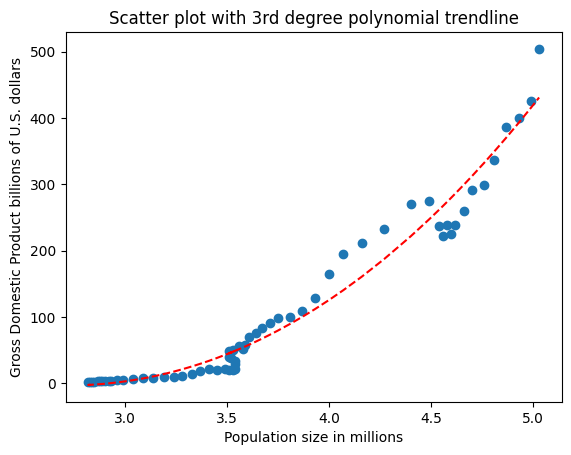

In [844]:
import matplotlib.pyplot as plt
import numpy as np

# Выбираем данные для осей x и y
y = final_df['Gross Domestic Product billions of U.S. dollars']
x = final_df['Population size in millions']

# Строим облако рассеивания
plt.scatter(x, y)

# Добавляем полиномиальную линию тренда
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

# Добавляем подписи к осям и заголовок
plt.xlabel('Population size in millions')
plt.ylabel('Gross Domestic Product billions of U.S. dollars')
plt.title('Scatter plot with 3rd degree polynomial trendline')

# Отображаем график
plt.show()

Влияние не просто линейное - а со временем степень воздействия населения на ВВП увеличивается

### Категория 2

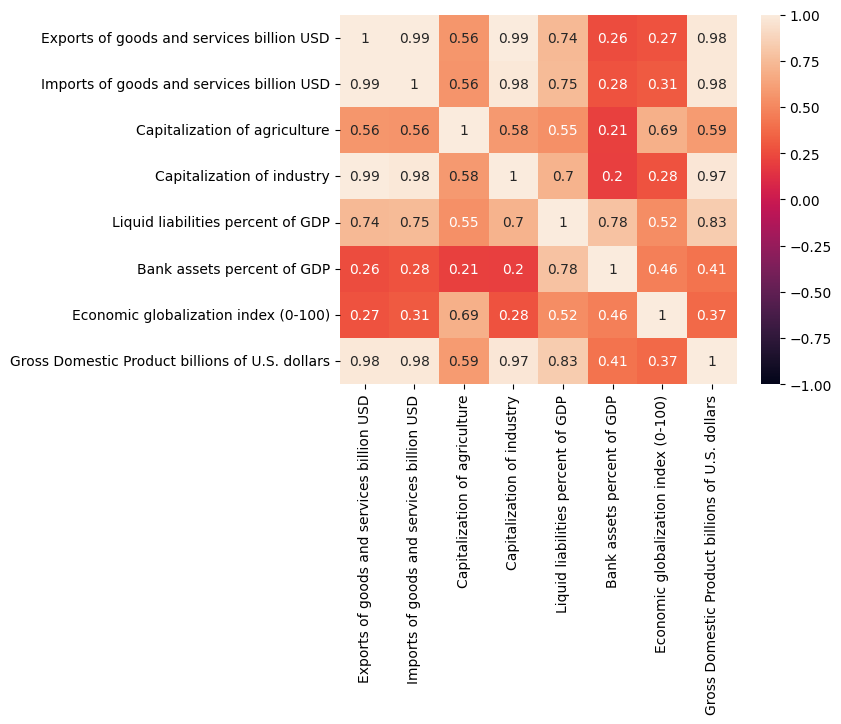

In [845]:
matrix_features = features_2 + ['Gross Domestic Product billions of U.S. dollars']
correlation_matrix_features_2 = final_df[matrix_features].corr()
sns.heatmap(correlation_matrix_features_2, annot=True, vmax=1, vmin=-1);

In [846]:
correlation_matrix_features_2['Gross Domestic Product billions of U.S. dollars'][correlation_matrix_features_2['Gross Domestic Product billions of U.S. dollars'].abs() > 0.9]

Exports of goods and services billion USD          0.981105
Imports of goods and services billion USD          0.979589
Capitalization of industry                         0.969426
Gross Domestic Product billions of U.S. dollars    1.000000
Name: Gross Domestic Product billions of U.S. dollars, dtype: float64

In [847]:
features_2 = ['Exports of goods and services billion USD', 'Imports of goods and services billion USD', 'Capitalization of industry']

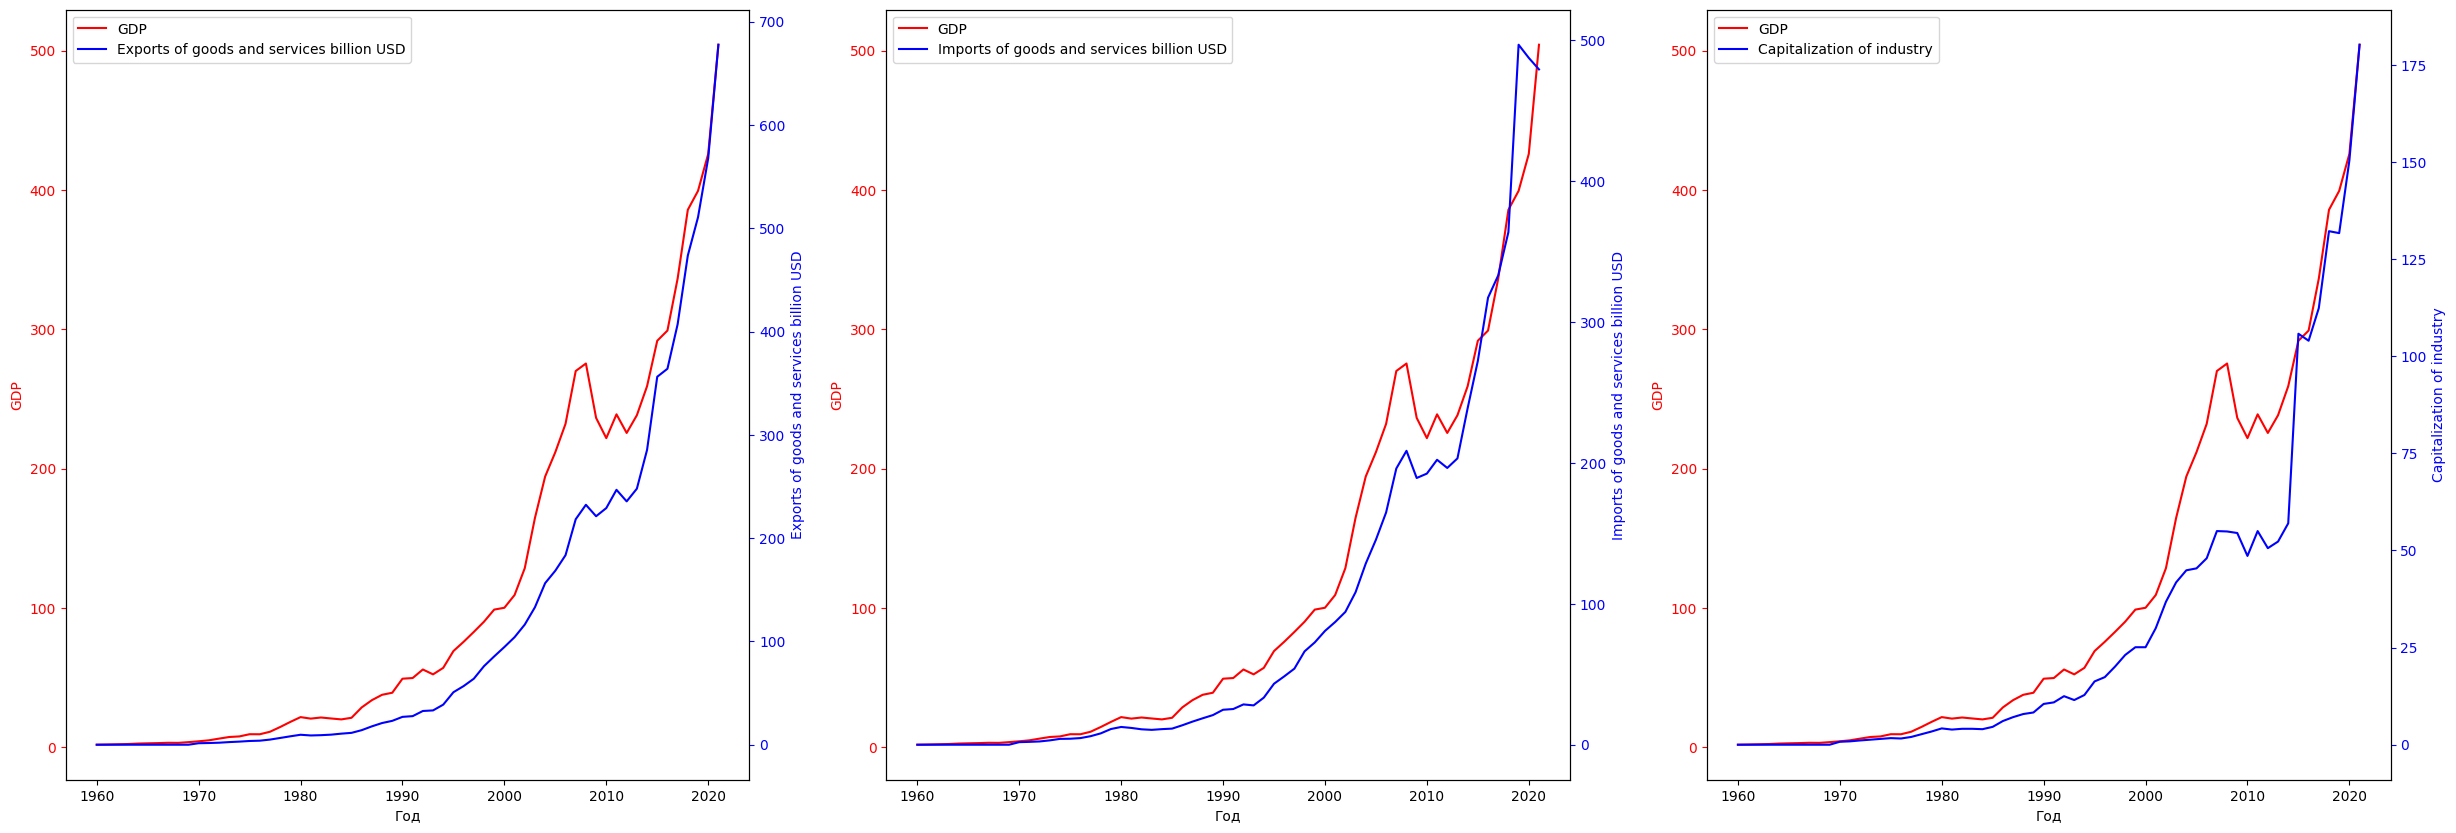

In [848]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

for i, k in enumerate(features_2):
    ax = axes[i]
    ax.plot(final_df['Year'], final_df['Gross Domestic Product billions of U.S. dollars'], 'r-', label='GDP')
    ax.set_xlabel('Год')
    ax.set_ylabel('GDP', color='r')
    ax.tick_params('y', colors='r')
    ax2 = ax.twinx()
    ax2.plot(final_df['Year'], final_df[k], 'b-', label=k)
    ax2.set_ylabel(k, color='b')
    ax2.tick_params('y', colors='b')
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

Каких-то очевидных закономерностей из данных графиков не следует. Они все просто достаточно схожи между собой

### Дальнейший поиск закономерностей

Теперь найдем пары с самыми большими корреляциями в целом. Быть может, это натолкнет нас на какие-либо мысли

In [849]:
correlation_matrix_all = final_df.corr();

In [850]:
correlation_matrix_all.unstack().sort_values(ascending=False).drop_duplicates()[:10]

Year                                             Year                                         1.000000
Exports of goods and services billion USD        Capitalization of industry                   0.993226
Imports of goods and services billion USD        Exports of goods and services billion USD    0.993010
Net portfolio equity inflows                     Foreign Direct Investment billion USD        0.989303
                                                 Exports of goods and services billion USD    0.987244
Capitalization of industry                       Imports of goods and services billion USD    0.983462
Imports of goods and services billion USD        Net portfolio equity inflows                 0.982465
Gross Domestic Product billions of U.S. dollars  Exports of goods and services billion USD    0.981105
                                                 Imports of goods and services billion USD    0.979589
Capitalization of industry                       Net portfolio equity inf

Исследуя наибольшие корреляции по всем парам признаков и соединяя получившиеся пары друг с другом можно прийти к следующей цепочки влияния:

<b>Foreign Direct Investment billion $\Rightarrow$ Net portfolio equity inflows $\Rightarrow$ Capitalization of industry $\Rightarrow$ Exports of goods and services billion USD $\Rightarrow$ Imports of goods and services billion USD $\Rightarrow$ Gross Domestic Product billions of U.S. dollars </b>

Эту цепочку можно объяснить логически:

1.   Первоночальное движение провоцирует рост ПИИ, что мы выяснили, изучая признаки первой категории
2.   Рост прямых инвестиций делает экономику более привлекательной для вложений и привлекает также портфельные инвестиции заинтересованных лиц
3.   Полученные инвестиции оседают в основном в промышленном секторе, увеличивая его капитализацию и делая его более развитым и конкурентноспособным
4.   Это позволяет выходить на международные рынки и увеличивать экспорт
5.   Увеличение экспорта увеличивает степень глобализации экономики Ирландии, взаимной торговли, из-за чего растет и импорт
6.   Итоговое увеличение экспорта и импорта приводит к росту ВВП

Так как на влияние ПИИ на ВВП воздействует количество рабочей силы, то в начале схемы можно поставить количество населения в стране. Итоговый вариант будет выглядеть так:

<b>Population size in millions $\Rightarrow$ Foreign Direct Investment billion $\Rightarrow$ Net portfolio equity inflows $\Rightarrow$ Capitalization of industry $\Rightarrow$ Exports of goods and services billion USD $\Rightarrow$ Imports of goods and services billion USD $\Rightarrow$ Gross Domestic Product billions of U.S. dollars </b>

<Figure size 2000x5000 with 0 Axes>

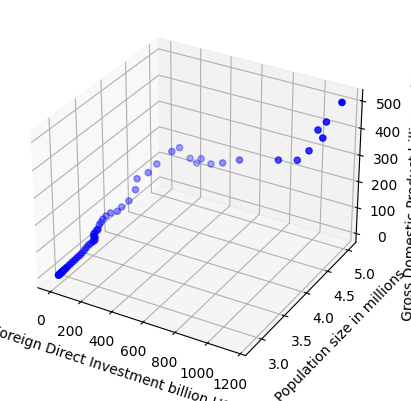

In [851]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(20, 50))
# Задаем данные
x = final_df['Foreign Direct Investment billion USD']
y = final_df['Population size in millions']
z = final_df['Gross Domestic Product billions of U.S. dollars']
c = 'b'  # цвет точек

# Создаем 3D-график
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=c)

# Настройки осей
ax.set_xlabel('Foreign Direct Investment billion USD')
ax.set_ylabel('Population size in millions')
ax.set_zlabel('Gross Domestic Product billions of U.S. dollars')

# Отображение графика
plt.show()


## Часть 4: Создание новых признаков

### FDI per capita

Ранее в графическом анализе мы предположили, что первичное влияние на ВВП оказывают ПИИ. При этом степень влияния ПИИ на ВВП зависит от степени прироста населения. Для того, чтобы вести дальнейший анализ необходимо ввести признак, который бы представлял из себя ПИИ, скорректированне на сдерживающий эффекти прироста населения.

Создадим признак, называемый  <b>FDI per capita </b>, который будет показывать сколько прямых инвестиций приходится на одного человека в Ирландии. Его формула следующая:
$$  \text{FDI per Capita} = \frac{\text{FDI}}{\Delta \cdot \text{Population}} $$

0.9280672523503373


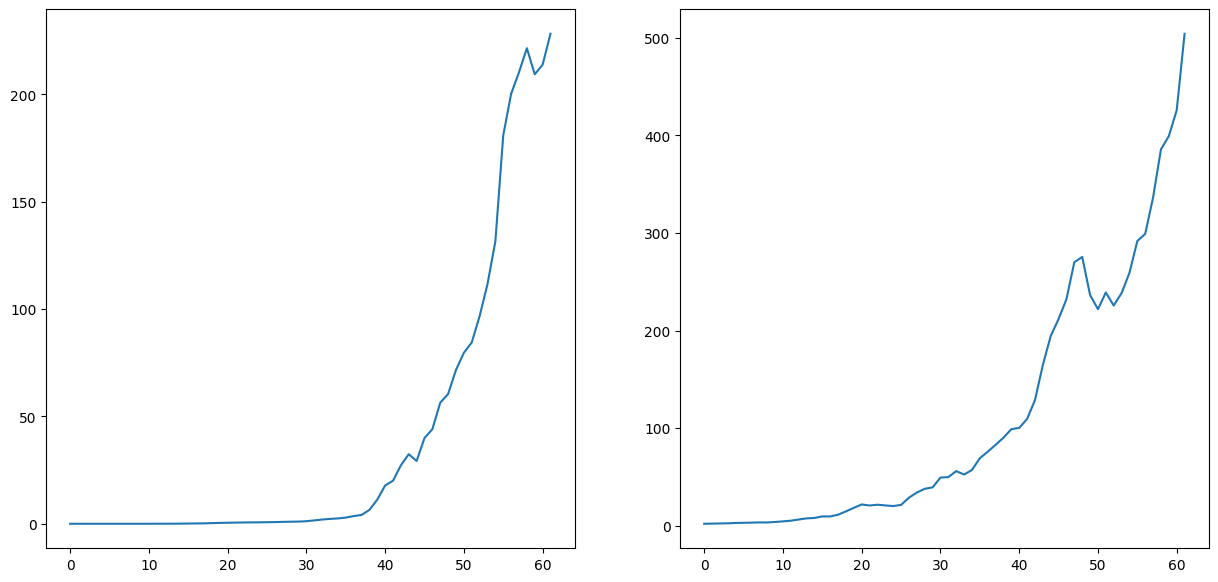

In [852]:
df_ex = final_df[['Gross Domestic Product billions of U.S. dollars', 'Population size in millions', 'Foreign Direct Investment billion USD']]
df_ex_pct = df_ex.pct_change()
FDI_per_capita = (df_ex['Foreign Direct Investment billion USD']/df_ex['Population size in millions'])
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].plot(FDI_per_capita)
ax[1].plot(final_df['Gross Domestic Product billions of U.S. dollars'])
FDI_per_capita = FDI_per_capita.fillna(0)
FDI_per_capita = FDI_per_capita.replace([np.inf, -np.inf], 0)
corr = FDI_per_capita.corr(final_df['Gross Domestic Product billions of U.S. dollars'], method='pearson')
print(corr)

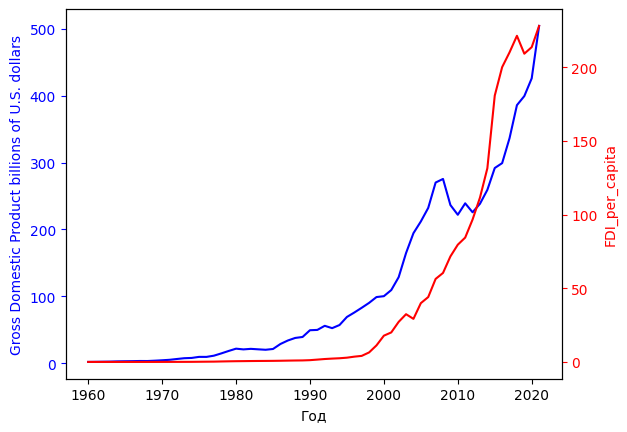

In [853]:
fig, ax1 = plt.subplots()

ax1.plot(final_df['Year'], final_df['Gross Domestic Product billions of U.S. dollars'], color='b')
ax1.set_xlabel('Год')
ax1.set_ylabel('Gross Domestic Product billions of U.S. dollars', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(final_df['Year'], FDI_per_capita, color='r')
ax2.set_ylabel('FDI_per_capita', color='r')
ax2.tick_params('y', colors='r')

plt.show()


Комментарии по FDI per capita:


*   Имеет большую взаимосвзяь с ВВП, чем просто ПИИ
*   Предсказывает общий тренд изменения ВВП, но не показывает спады



### Foreign direct investments by population growth (FDIBPG)

Ещё один признак, которой мог бы отражает влияние прямых инвестиций в зависимости от население - FDIBPG. Его отличие от предыдущего в том, что здесь большую роль играет не само население, а его прирост. Данный признак основан на предположении о том, что приходящему в страну капиталу всегда нужен прирост населения, который этот входящий капитал бы использовал. Формула для данной характеристики следующая:
$$   {FDIBPG} = \frac{FDI}{\Delta \cdot Population}   $$

0.9033147020464922


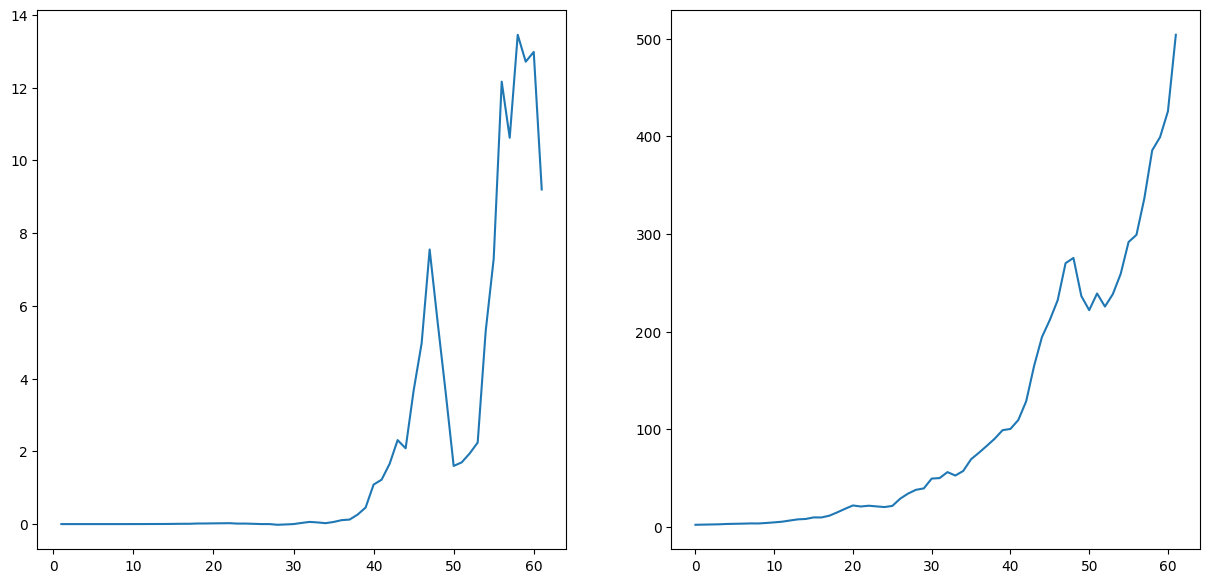

In [854]:
FDIBPG = (df_ex['Foreign Direct Investment billion USD']*df_ex_pct['Population size in millions'])
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].plot(FDIBPG)
ax[1].plot(final_df['Gross Domestic Product billions of U.S. dollars'])
FDIBPG = FDIBPG.fillna(0)
FDIBPG = FDIBPG.replace([np.inf, -np.inf], 0)
corr = FDIBPG.corr(final_df['Gross Domestic Product billions of U.S. dollars'], method='pearson')
print(corr)

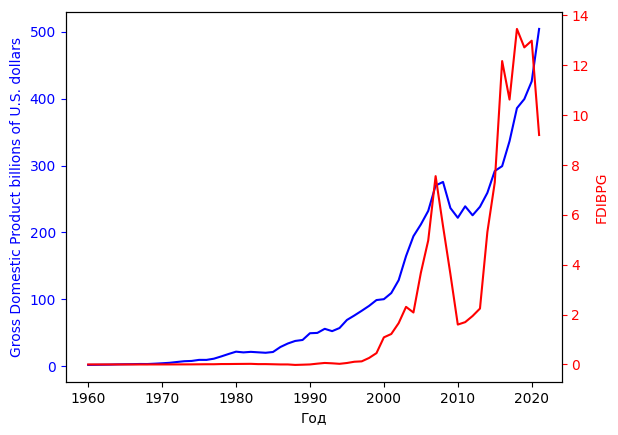

In [855]:
fig, ax1 = plt.subplots()

ax1.plot(final_df['Year'], final_df['Gross Domestic Product billions of U.S. dollars'], color='b')
ax1.set_xlabel('Год')
ax1.set_ylabel('Gross Domestic Product billions of U.S. dollars', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(final_df['Year'], FDIBPG, color='r')
ax2.set_ylabel('FDIBPG', color='r')
ax2.tick_params('y', colors='r')

plt.show()

Комментарии по FDIBPG:


*   Тоже имеет высокую корреляцию с ВВП
*   Имеет свойство предсказывать экономические спады
*   Более изменчив, чем FGI per capita


### Industrial Index (II)

В процессе первичного анализа мы также смогли выявить, что значимасть сельскохозяйственного сектора в экономике Ирландии во временем уменьшалась, в то время как капитализация индустриального - наоборот, росла, и очень сильно влияла на ВВП. Поэтому с точки зрения экономического роста, выгоднее, чтобы прямые инвестиции шли именно в промышленный сектор, увеличивая индустриализацию страны. Чтобы оценить степень индустриализации, введем соотвествующий индекс:




$$  II = \frac{\text{Capitalization of industry} / \text{Gross Domestic Product}}{(\text{Capitalization of industry} + \text{Capitalization of agriculture}) / \text{Gross Domestic Product}}
  $$

0.8267039098292188


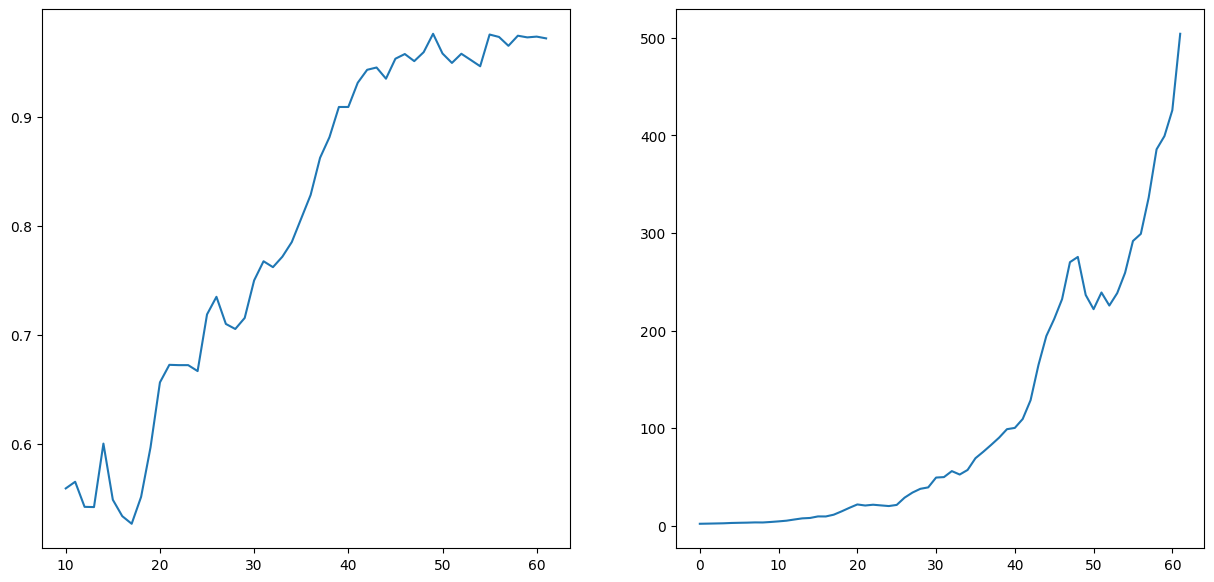

In [856]:
II = (final_df['Capitalization of industry']/final_df['Gross Domestic Product billions of U.S. dollars'])/((final_df['Capitalization of industry'] + final_df['Capitalization of agriculture'])/final_df['Gross Domestic Product billions of U.S. dollars'])
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].plot(II)
ax[1].plot(final_df['Gross Domestic Product billions of U.S. dollars'])
II = II.fillna(0)
II = II.replace([np.inf, -np.inf], 0)
corr = II[10:].corr(final_df['Gross Domestic Product billions of U.S. dollars'].iloc[10:], method='pearson')
print(corr)

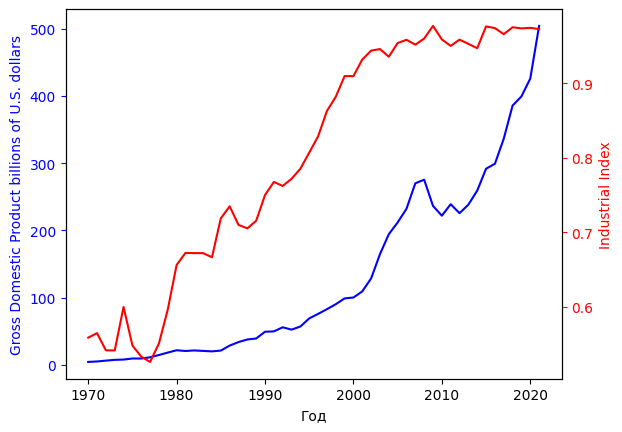

In [857]:
fig, ax1 = plt.subplots()

ax1.plot(final_df['Year'][10:], final_df['Gross Domestic Product billions of U.S. dollars'].iloc[10:], color='b')
ax1.set_xlabel('Год')
ax1.set_ylabel('Gross Domestic Product billions of U.S. dollars', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(final_df['Year'][10:], II[10:], color='r')
ax2.set_ylabel('Industrial Index', color='r')
ax2.tick_params('y', colors='r')

plt.show()

### Technological intensity of exports (TIE)

Мы уже знаем, что экспорт и развитие промышленного производства сильно влияют на ВВП. Попробуем объединить два этих признака в одном:

$$ TIE = \frac{\text{Capitalization of industry}}{\text{Exports of goods and services}} \cdot 100 $$

-0.08768734518510937


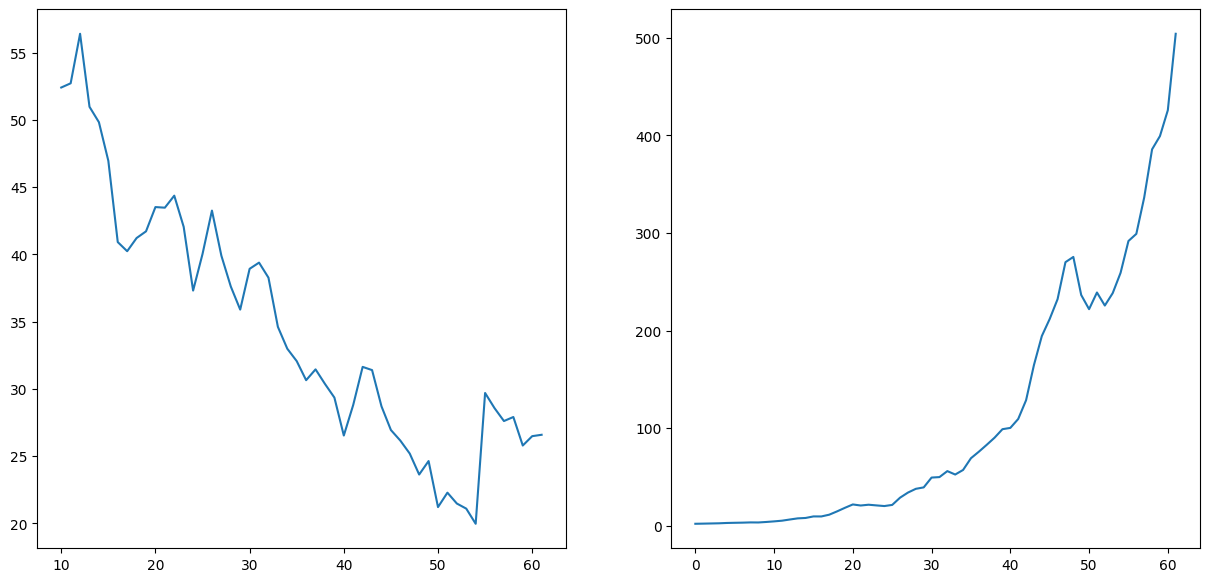

In [858]:
TIE = (final_df['Capitalization of industry']/final_df['Exports of goods and services billion USD'])*100
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].plot(TIE)
ax[1].plot(final_df['Gross Domestic Product billions of U.S. dollars'])
TIE = TIE.fillna(0)
TIE = TIE.replace([np.inf, -np.inf], 0)
corr = TIE.corr(final_df['Gross Domestic Product billions of U.S. dollars'], method='pearson')
print(corr)

Как видно, в целом, признак мало общего имеет с ВВП. Добавлять его в итоговый датасет не имеет смысла

In [859]:
final_df['II'] = II
final_df['FDIBPG'] = FDIBPG
final_df['FDI per Capita'] = FDI_per_capita

In [860]:
final_df

,Year,Gross Domestic Product billions of U.S. dollars,Labor force million people,Exports of goods and services billion USD,Imports of goods and services billion USD,Foreign Direct Investment billion USD,Net portfolio equity inflows,Government spending,Liquid liabilities percent of GDP,Bank assets percent of GDP,Population size in millions,Percent urban population,Economic globalization index (0-100),Inflation rate,Capitalization of agriculture,Capitalization of industry,II,FDIBPG,FDI per Capita
0,1960,1.94,0.00,0.00,0.00,0.00,0.00,0.000000,10.68,32.83,2.83,45.18,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,1961,2.09,0.00,0.00,0.00,0.00,0.00,0.000000,10.74,32.45,2.82,45.39,0.00,0.0,0.0,0.0,0.000000,-0.000000,0.000000
2,1962,2.26,0.00,0.00,0.00,0.00,0.00,0.000000,10.64,32.43,2.84,45.60,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,1963,2.43,0.00,0.00,0.00,0.00,0.00,0.000000,11.94,33.58,2.85,45.81,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,1964,2.77,0.00,0.00,0.00,0.00,0.00,0.000000,5.60,34.30,2.87,46.02,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2017,336.38,2.35,407.07,332.97,1011.31,2278493.88,0.123224,98.17,49.95,4.81,62.95,87.97,0.3,4.0,112.4,0.965636,10.623004,210.251559
58,2018,385.74,2.40,473.63,363.72,1078.67,2384105.76,0.120133,93.93,46.12,4.87,63.17,87.81,0.0,3.4,132.2,0.974926,13.455343,221.492813
59,2019,399.32,2.45,510.65,496.64,1032.04,2629892.76,0.120154,98.68,40.36,4.93,63.40,88.14,0.0,3.6,131.7,0.973392,12.715072,209.338742
60,2020,425.85,2.43,567.82,487.30,1066.82,2840388.89,0.128966,116.59,37.66,4.99,63.65,88.00,0.0,4.0,150.4,0.974093,12.983611,213.791583


## Часть 5: Гипотеза

Идея 1 (проверяет влияние ПИИ на ВВП):


*   Делим дни на те, где был рост ПИИ, и где не было роста ПИИ
*   Находим математическое ожидание роста ВВП в дни, когда был рост (существенный рост) ПИИ, и когда не было
*   Проверяем гипотезу о том, что мат. ожидание роста ВВП в дни наличия и отсутствия роста ПИИ было одинаковым


---
Идея 2 (проверяет гипотезу о наличии некотрого "уровня достаточности капитала"):
*   Находим некоторый медианный уровень прироста населения
*   Делим данные по росту ВВП на те дни, когда значение прироста населения было меньше заданной величины, и когда больше
*   Проверяем гипотезу о равенстве мат. ожидания






In [861]:
final_df['FDI diff'] = final_df['Foreign Direct Investment billion USD'].diff()
final_df['FDI changes'] = np.where(final_df['FDI diff'] > 0, 'Growth of FDI', 'No growth of FDI')
fdi_growth = final_df[final_df['FDI changes'] == 'Growth of FDI']['Gross Domestic Product billions of U.S. dollars']
no_fdi_growth = final_df[final_df['FDI changes'] == 'No growth of FDI']['Gross Domestic Product billions of U.S. dollars']

In [862]:
from statsmodels.stats.weightstats import ztest as ztest

def check_hypothesis(sample_1, sample_2, alpha):

  Z_stat, p_value = ztest(sample_1, sample_2, value=0, alternative='larger')
  if alpha > p_value:
    print(f'При уровне значимости {int(alpha*100)}% нулевая гипотеза отвергается')
  else:
    print(f'При уровне значимости {int(alpha*100)}% нулевая гипотеза не отвергается')

In [863]:
check_hypothesis(fdi_growth, no_fdi_growth, 0.05)
check_hypothesis(fdi_growth, no_fdi_growth, 0.1)

При уровне значимости 5% нулевая гипотеза отвергается
При уровне значимости 10% нулевая гипотеза отвергается


In [864]:
print(fdi_growth.mean(), no_fdi_growth.mean())

123.94760000000002 51.803333333333335


In [865]:
final_df['Population diff'] = final_df['Population size in millions'].diff()
final_df['Population changes'] = np.where(final_df['Population diff'] > final_df['Population diff'].median(), 'Growth of population', 'No growth of population')
population_growth = final_df[final_df['Population changes'] == 'Growth of population']['Gross Domestic Product billions of U.S. dollars']
no_population_growth = final_df[final_df['Population changes'] == 'No growth of population']['Gross Domestic Product billions of U.S. dollars']

In [866]:
check_hypothesis(population_growth, no_population_growth, 0.05)
check_hypothesis(population_growth, no_population_growth, 0.1)

При уровне значимости 5% нулевая гипотеза отвергается
При уровне значимости 10% нулевая гипотеза отвергается


In [867]:
final_df = final_df.drop(['FDI diff', 'FDI changes', 'Population diff', 'Population changes'], axis=1)


## Часть 6: Машинное обучение

In [868]:
final_df.drop('Year', axis=1, inplace=True)
df_train, df_test = train_test_split(final_df.select_dtypes(include=[np.number]), test_size=0.2, random_state=101)
y_train = df_train['Gross Domestic Product billions of U.S. dollars']
y_test = df_test['Gross Domestic Product billions of U.S. dollars']
X_train = df_train.drop('Gross Domestic Product billions of U.S. dollars', axis=1)
X_test = df_test.drop('Gross Domestic Product billions of U.S. dollars', axis=1)

### Нормируем данные

In [869]:
columns_name = final_df.columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Подбор параметров для Lasso-регрессии

In [870]:
lasso_model = Lasso()

# Задание сетки гиперпараметров для Grid Search
param_grid = {'alpha':np.linspace(0.5, 1.5, 100), 'max_iter': np.linspace(500, 600, 100).astype(int)}

# Создание объекта GridSearchCV с моделью и параметрами
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Подгонка модели с использованием Grid Search
grid_search.fit(X_train_scaled, y_train)

# Получение лучших параметров и значения метрики
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Лучшие параметры:", best_params)
print("Лучшая отрицательная среднеквадратичная ошибка:", best_score);

Лучшие параметры: {'alpha': 1.5, 'max_iter': 500}
Лучшая отрицательная среднеквадратичная ошибка: -349.76709467251965


Оценим качество модели на тестовых данных

In [871]:
lasso_model = Lasso(alpha=1.5, max_iter = 500)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1.5, max_iter=500)

In [872]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Вычисление прогнозов модели на тестовых данных
y_pred = lasso_model.predict(X_test_scaled)

# Вычисление среднеквадратичной ошибки (MSE)
mse = mean_squared_error(y_test, y_pred)

# Вычисление средней абсолютной ошибки (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Вычисление коэффициента детерминации (R2)
r2 = r2_score(y_test, y_pred)

print("Среднеквадратичная ошибка (MSE):", mse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Коэффициент детерминации (R2):", r2)

Среднеквадратичная ошибка (MSE): 85.75526108190707
Средняя абсолютная ошибка (MAE): 6.57517117426595
Коэффициент детерминации (R2): 0.995558798605006


Модель получилась дествительно хорошей. Она предугадывает около 99,6% разброса данных, что очень хорошо.

In [873]:
for col, coef in zip(X_train.columns, lasso_model.coef_):
    print(f'{col} --- {coef}')

Labor force million people --- 14.919355810953828
Exports of goods and services billion USD --- 77.65821033690946
Imports of goods and services billion USD --- 0.0
Foreign Direct Investment billion USD --- 0.0
Net portfolio equity inflows --- 0.0
Government spending --- -0.0
Liquid liabilities percent of GDP --- 0.0
Bank assets percent of GDP --- 13.300125529914816
Population size in millions --- 10.24646694440595
Percent urban population --- 0.0
Economic globalization index (0-100) --- -0.0
Inflation rate --- 0.0
Capitalization of agriculture --- -0.0
Capitalization of industry --- 6.888044703357705
II --- 0.0
FDIBPG --- 14.207211453633592
FDI per Capita --- 0.0


Мы обучили модель Lasso-регрессии, которая характеризуется тем, что "избавляется" от ненужных признаков. Обученная модель в нашем случае опирается только на такие признаки, как Labor force million people, Exports of goods and services billion USD, Bank assets percent of GDP, Population size in millions, Capitalization of industry, FDIBPG. Какие же выводы можно сделать из коэффициентов обученной модели?


1.   В наибольшей степени предсказания модели строятся на показателе экспорта товаров, а этот признак мы ранее признали, как относящийся к группе меняющихся под воздействием ВВП, а не воздействующих на ВВП, поэтому для получения более точных выводов необходимо обучить модель только на группе признаков, которая, предположительно, воздействует на ВВП, а не наоборот.
2.   Обученная модель опирается также на количество населения, рабочей силы и индекс FDIBPG, что **косвенно опять же подтверждает полученные ранее выводы о том, что именно население опосредованно влияет на ВВП** (если lasso-регрессия не обнулила коэффициент данного признака, следовательно, он объясняет разброс целевой переменной)



Обучим модель на первой группе признаков:

In [874]:
features_1.extend(['II', 'FDIBPG', 'FDI per Capita', 'Gross Domestic Product billions of U.S. dollars'])
features_1 = ['Government spending' if x == 'Government spending billion USD' else x for x in features_1]

df_train, df_test = train_test_split(final_df[features_1].select_dtypes(include=[np.number]), test_size=0.2, random_state=42)
y_train = df_train['Gross Domestic Product billions of U.S. dollars']
y_test = df_test['Gross Domestic Product billions of U.S. dollars']
X_train = df_train.drop('Gross Domestic Product billions of U.S. dollars', axis=1)
X_test = df_test.drop('Gross Domestic Product billions of U.S. dollars', axis=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_model = Lasso()

# Задание сетки гиперпараметров для Grid Search
param_grid = {'alpha':np.linspace(0.5, 1.5, 100), 'max_iter': np.linspace(500, 600, 100).astype(int)}

# Создание объекта GridSearchCV с моделью и параметрами
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Подгонка модели с использованием Grid Search
grid_search.fit(X_train_scaled, y_train)

# Получение лучших параметров и значения метрики
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Лучшие параметры:", best_params)
print("Лучшая отрицательная среднеквадратичная ошибка:", best_score);

Лучшие параметры: {'alpha': 0.5, 'max_iter': 500}
Лучшая отрицательная среднеквадратичная ошибка: -542.3194592316083


In [875]:
lasso_model = Lasso(alpha=1.5, max_iter = 500)
lasso_model.fit(X_train_scaled, y_train)
# Вычисление прогнозов модели на тестовых данных
y_pred = lasso_model.predict(X_test_scaled)

# Вычисление среднеквадратичной ошибки (MSE)
mse = mean_squared_error(y_test, y_pred)

# Вычисление средней абсолютной ошибки (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Вычисление коэффициента детерминации (R2)
r2 = r2_score(y_test, y_pred)

print("Среднеквадратичная ошибка (MSE):", mse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Коэффициент детерминации (R2):", r2, '\n')

for col, coef in zip(X_train.columns, lasso_model.coef_):
    print(f'{col} --- {coef}')

Среднеквадратичная ошибка (MSE): 856.2816785542983
Средняя абсолютная ошибка (MAE): 19.803101606733943
Коэффициент детерминации (R2): 0.9611149177118116 

Foreign Direct Investment billion USD --- 0.0
Net portfolio equity inflows --- 54.129404872263514
Government spending --- -18.171593214223634
Population size in millions --- 48.372171197128004
II --- 19.723738771151137
FDIBPG --- 9.789043355049543
FDI per Capita --- 0.0


Сократив входные параметры модели только до тех, что скорее влияют на ВВП, мы получили достаточно интресные результаты: теперь модель предыгудывает около 96% разброса целевой переменной, что по-прежднему очень хорошо. В основном модель опирается на приток портфельных инвестиций и население в стране, что также сходится с ранее полученными выводами. Также модель подтверждает, что государственные расходы отрицательно влияют на ВВП.

сделаем последнюю модель, принимающую на вход только те характеристики, которые наиболее вероятно никак не зависят от ВВП, и по которым неоднократно были сделаны умозаключения относительно их влияния на ВВП. Тут уже будем использовать Ridge-регрессию, так как входящих параметров и так мало, и нет необходимости их дополнительно сокращать.

In [876]:
df_train, df_test = train_test_split(final_df[['Gross Domestic Product billions of U.S. dollars', 'Foreign Direct Investment billion USD', 'Population size in millions', 'FDIBPG', 'Government spending']].select_dtypes(include=[np.number]), test_size=0.2, random_state=42)
y_train = df_train['Gross Domestic Product billions of U.S. dollars']
y_test = df_test['Gross Domestic Product billions of U.S. dollars']
X_train = df_train.drop('Gross Domestic Product billions of U.S. dollars', axis=1)
X_test = df_test.drop('Gross Domestic Product billions of U.S. dollars', axis=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [877]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# задание сетки гиперпараметров для перебора
param_grid = {
    'alpha': np.logspace(-3, 3, 25), # перебор значений параметра регуляризации
}

# создание объекта GridSearchCV с заданными параметрами
grid_search = GridSearchCV(
    ridge, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1
)

# запуск подбора гиперпараметров на тренировочном наборе данных
grid_search.fit(X_train, y_train)

# вывод лучшей комбинации гиперпараметров и соответствующего среднеквадратичного ошибки
print("Best parameters: ", grid_search.best_params_)
print("Best CV score: ", -grid_search.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters:  {'alpha': 0.0017782794100389228}
Best CV score:  862.6011817910752


In [878]:
ridge_model = Ridge(alpha=0.0017782794100389228)
ridge_model.fit(X_train_scaled, y_train)

# Вычисление прогнозов модели на тестовых данных
y_pred = ridge_model.predict(X_test_scaled)

# Вычисление среднеквадратичной ошибки (MSE)
mse = mean_squared_error(y_test, y_pred)

# Вычисление средней абсолютной ошибки (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Вычисление коэффициента детерминации (R2)
r2 = r2_score(y_test, y_pred)

print("Среднеквадратичная ошибка (MSE):", mse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Коэффициент детерминации (R2):", r2)

Среднеквадратичная ошибка (MSE): 1090.3815937928216
Средняя абсолютная ошибка (MAE): 22.461436742989275
Коэффициент детерминации (R2): 0.9504840766046225


In [879]:
for col, coef in zip(X_train.columns, ridge_model.coef_):
    print(f'{col} --- {coef}')

Foreign Direct Investment billion USD --- 18.682053831515848
Population size in millions --- 84.35569022508689
FDIBPG --- 24.71752096651241
Government spending --- -17.077942779487767


обучив третью модель, мы можем прийтий к выводу о том, что всего 4 важнейших параметра с точностью 95% могут предсказать ВВП Ирландии. Эти параметры - ПИИ, население, FDIBPG и государственные расходы, где наибольшее влияние оказывает количество населения.

## Часть 7: Итоги

В качестве основных результатов проведенного исследования можно выделить следующее:

1.   Выделение ПИИ, портфельных инвестиций и численность населения как основных источников роста Ирландской экономики
2.   Выявление особенного характера влияния уровня населения на ПИИ и ВВП, отличающегося от предпосылок макроэкономической теории (в реальности производная функции производства по труду может быть отрицательной или положительной в зависимости от уровня достаточности населения)
3.   Создание новых признаков, позволяющих отследать вявленные взаимосвязи
4.   Подтверждение наличия выявленных взаимосвязий с помощью гипотез
5.   Построение регрессионной модели, позволяющей предсказывать ВВП, опираясь на два ключевых общедоступных параметра



В настоящей работе были проведены исследования, направленные на изучение роста валового внутреннего продукта (ВВП) Ирландии. Целью исследования было выявить основные источники роста экономики и понять особенности влияния уровня населения на прямые иностранные инвестиции (ПИИ) и ВВП страны.

В результате исследования были получены следующие ключевые результаты. Во-первых, выявлено, что ПИИ, портфельные инвестиции и численность населения играют ключевую роль в стимулировании роста ВВП Ирландии. Эти факторы были выделены как основные источники роста экономики в последние годы.

Кроме того, удалось выявить, что влияние уровня населения на ПИИ и ВВП Ирландии имеет особенности, отличные от предпосылок макроэкономической теории. Визуализация и дальнейший анализ показали, что производная функции производства по труду может быть отрицательной или положительной в зависимости от уровня достаточности населения. Это открывает новые возможности для более глубокого понимания взаимосвязей между населением, инвестициями и ростом экономики.

Для дальнейшего анализа этих взаимосвязей были созданы новые признаки, такие как 'II', 'FDIBPG', 'FDI per Capita'. Это позволило более детально изучить динамику данных и отследить выявленные взаимосвязи.

Для подтверждения статистической значимости и релевантности выявленных взаимосвязей были использованы статистические методы и проверены соответствующие гипотезы. Результаты исследования подтвердили наличие связи между ПИИ, населением и ростом ВВП Ирландии.

На основе полученных результатов была построена регрессионная модель, позволяющая прогнозировать рост ВВП Ирландии. Модель использует информацию о ПИИ, численности населения и других параметрах, что делает ее полезным инструментом для принятия экономических решений и планирования развития страны.

В целом, результаты исследования подчеркивают важность прямых иностранных инвестиций, портфельных инвестиций и численности населения в стимулировании роста экономики Ирландии. Открытие особенностей влияния населения на ПИИ и ВВП предоставляет новый уровень понимания и может быть полезным для формулирования экономической политики и стратегии развития страны.